In [123]:
DATA_PATH = "/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/"

In [131]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

In [132]:
def plot_single_t2m(ax, precip, color_interval, cmap):#:subtitle):
    
    jlon = np.linspace(0,357.5,144)
    jlat = np.linspace(-90,90,96)
    prj = ccrs.PlateCarree()
    # Add longitude and latitude ticks
    ax.set_xticks(np.arange(0, 361, 30), crs=prj)  # Longitude ticks
    ax.set_yticks(np.arange(-90, 91, 30), crs=prj)  # Latitude ticks
    
    # Label ticks with degrees
    lon_labels = [str(lon) + 'E' if lon < 180 else str(360-lon) + 'W' for lon in np.arange(0, 361, 30)]
    lon_labels[lon_labels.index("180W")] = "180"
    lon_labels[lon_labels.index("0W")] = "0"
    lon_labels[lon_labels.index("0E")] = "0"
    lat_labels = [str(lat) + 'N' if lat >= 0 else str(abs(lat)) + 'S' for lat in np.arange(-90, 91, 30)]
    
    ax.set_xticklabels(lon_labels, fontsize=6)
    ax.set_yticklabels(lat_labels, fontsize=6)

    # axs = fig.add_subplot(gs[i, j], projection = ccrs.PlateCarree(central_longitude=180))
  # axs = fig.add_subplot(projection = ccrs.Robinson(central_longitude=180)) 
    ax.add_feature(cfeature.COASTLINE, edgecolor = '#333333', linewidth=0.5)
  # cs0 = axs.contourf(jlon, jlat, precip, np.linspace(plotrange[0], plotrange[1], 21), cmap =plt.cm.coolwarm, extend='both', transform = prj)
    #cs0 = axs.contourf(jlon, jlat, precip, color_interval, cmap =plt.cm.coolwarm, extend='both', transform = prj)
    cs0 = ax.contourf(jlon, jlat, precip, color_interval, cmap =cmap, extend='both', transform = prj)
    ax.tick_params(labelsize = 6)

In [133]:
jja_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/JJA_t2m.npy")
djf_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/DJF_t2m.npy")
ann_t2m = np.load("/Users/jiandachen/Projects/PaperWriting/replaybuffer/plot_data/era5/ANN_t2m.npy")

In [134]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1546276724.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1546276724.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


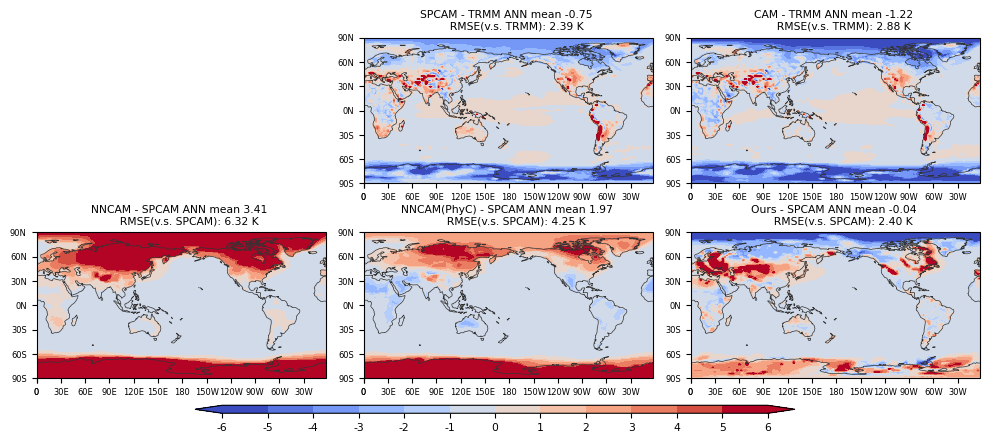

In [135]:


# Define the tick values and corresponding boundaries
tick_values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
boundaries = np.array(tick_values)

# Create a color map and normalization
# cmap = cm.get_cmap('rainbow', len(tick_values)-1)
cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))

ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(-6, 7, 21)
# plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, ann_t2m[1]-ann_t2m[0], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM - TRMM ANN mean {np.mean(ann_t2m[1]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. TRMM): {rmse(ann_t2m[1], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, ann_t2m[4]-ann_t2m[0], color_interval, cmap=cmap)
ax3.set_title(f"CAM - TRMM ANN mean {np.mean(ann_t2m[4]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. TRMM): {rmse(ann_t2m[4], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, ann_t2m[2]-ann_t2m[1], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM - SPCAM ANN mean {np.mean(ann_t2m[2]-ann_t2m[1]):.2f} \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[2], ann_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax5, ann_t2m[3]-ann_t2m[1], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) - SPCAM ANN mean {np.mean(ann_t2m[3]-ann_t2m[1]):.2f} \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[3], ann_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax6, ann_t2m[5]-ann_t2m[1], color_interval, cmap=cmap)
ax6.set_title(f"Ours - SPCAM ANN mean {np.mean(ann_t2m[5]-ann_t2m[1]):.2f} \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[5], ann_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
# ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
# ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
# ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
# ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
# ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
# ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
# ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
# ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
# ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
# ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
# ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
# ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()

In [136]:
print(ann_t2m.shape)

(9, 96, 144)


In [137]:
print(ann_t2m[5].mean())
print(ann_t2m[6].mean())

277.31218019284216
277.26836478382717


/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/2760244447.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/2760244447.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


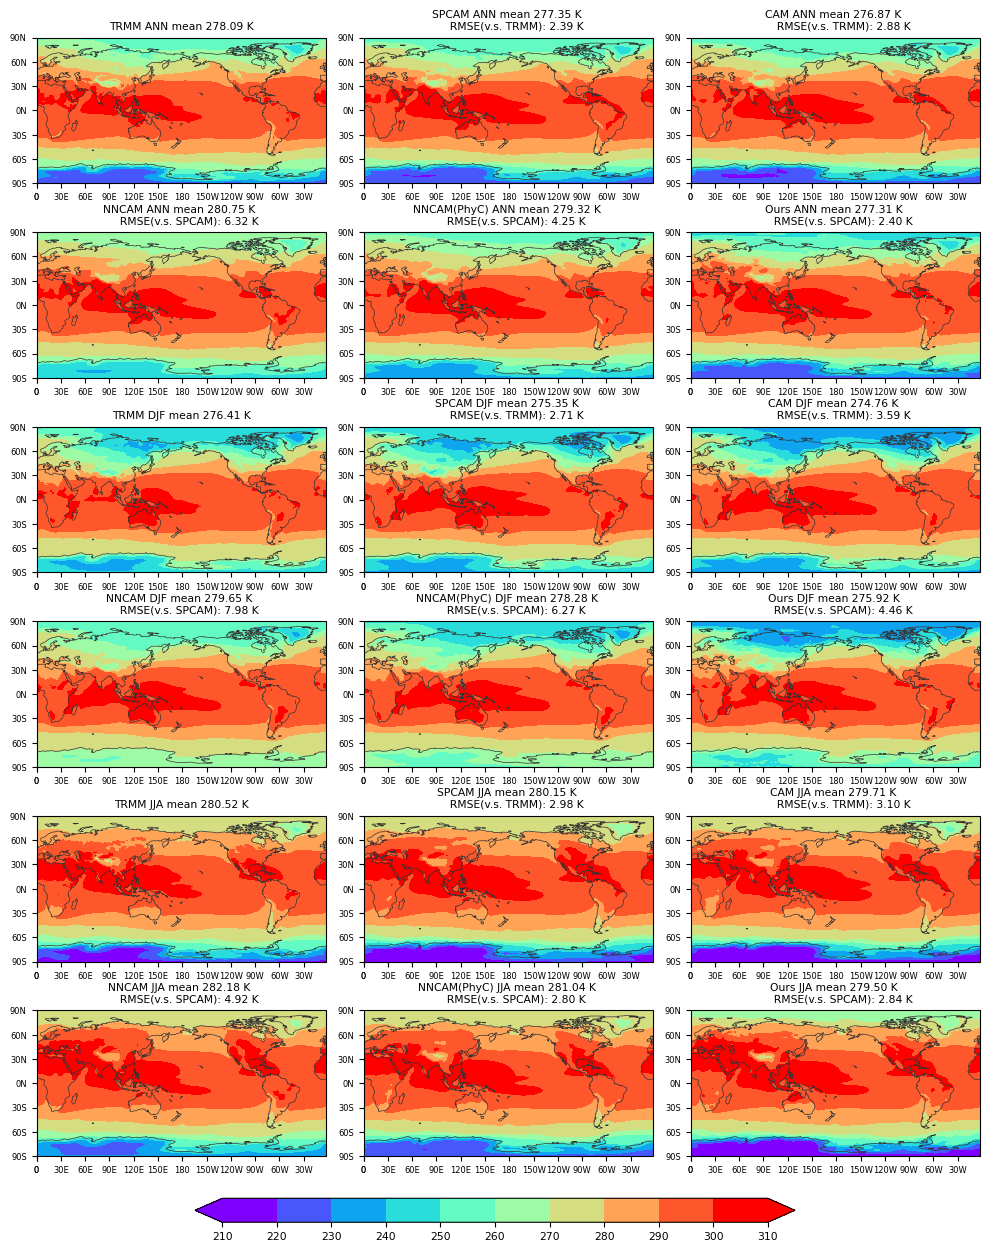

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

# Define the tick values and corresponding boundaries
tick_values = [210,220,230,240,250,260,270,280,290,300,310]
boundaries = np.array(tick_values)

# Create a color map and normalization
cmap = cm.get_cmap('rainbow', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)[22:74]

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(6, 3)
ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(210, 310, 21)
plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, ann_t2m[1], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM ANN mean {np.mean(ann_t2m[1]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(ann_t2m[1], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, ann_t2m[4], color_interval, cmap=cmap)
ax3.set_title(f"CAM ANN mean {np.mean(ann_t2m[4]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(ann_t2m[4], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, ann_t2m[2], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM ANN mean {np.mean(ann_t2m[2]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[2], ann_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax5, ann_t2m[3], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) ANN mean {np.mean(ann_t2m[3]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[3], ann_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax6, ann_t2m[5], color_interval, cmap=cmap)
ax6.set_title(f"Ours ANN mean {np.mean(ann_t2m[5]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(ann_t2m[5], ann_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} K \n \
    RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} K \n \
    RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.25, wspace=0.13)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1550760840.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1550760840.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


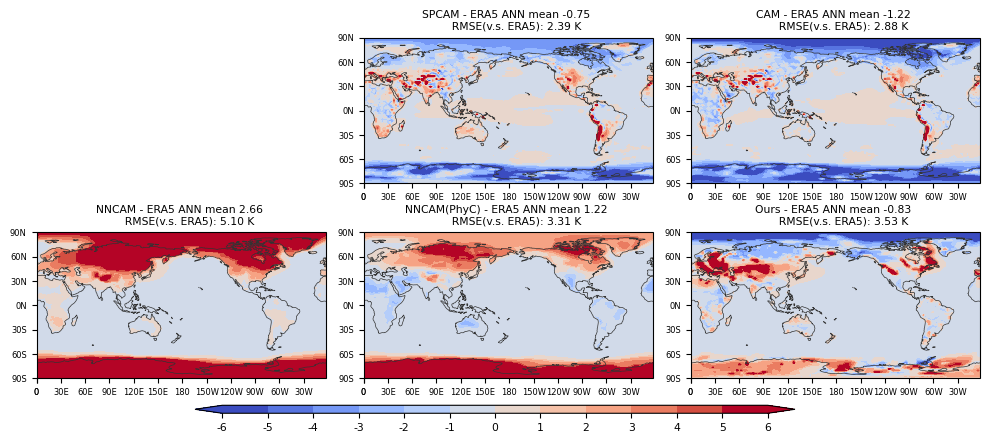

In [ ]:


# Define the tick values and corresponding boundaries
tick_values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
boundaries = np.array(tick_values)

# Create a color map and normalization
# cmap = cm.get_cmap('rainbow', len(tick_values)-1)
cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))

ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(-6, 7, 21)
# plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, ann_t2m[1]-ann_t2m[0], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM - ERA5 ANN mean {np.mean(ann_t2m[1]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[1], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, ann_t2m[4]-ann_t2m[0], color_interval, cmap=cmap)
ax3.set_title(f"CAM - ERA5 ANN mean {np.mean(ann_t2m[4]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[4], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, ann_t2m[2]-ann_t2m[1], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM - ERA5 ANN mean {np.mean(ann_t2m[2]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[2], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax5, ann_t2m[3]-ann_t2m[1], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) - ERA5 ANN mean {np.mean(ann_t2m[3]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[3], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax6, ann_t2m[5]-ann_t2m[1], color_interval, cmap=cmap)
ax6.set_title(f"Ours - ERA5 ANN mean {np.mean(ann_t2m[6]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[5], ann_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
# ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
# ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
# ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
# ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
# ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
# ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
# ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
# ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
# ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
# ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
# ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
# ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/2387517589.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/2387517589.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


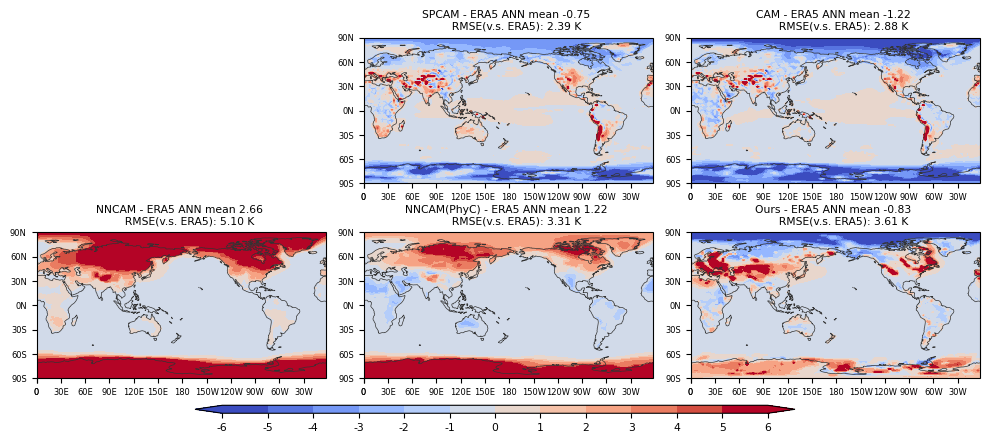

In [140]:


# Define the tick values and corresponding boundaries
tick_values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
boundaries = np.array(tick_values)

# Create a color map and normalization
# cmap = cm.get_cmap('rainbow', len(tick_values)-1)
cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))

ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(-6, 7, 21)
# plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, ann_t2m[1]-ann_t2m[0], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM - ERA5 ANN mean {np.mean(ann_t2m[1]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[1], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, ann_t2m[4]-ann_t2m[0], color_interval, cmap=cmap)
ax3.set_title(f"CAM - ERA5 ANN mean {np.mean(ann_t2m[4]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[4], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, ann_t2m[2]-ann_t2m[1], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM - ERA5 ANN mean {np.mean(ann_t2m[2]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[2], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax5, ann_t2m[3]-ann_t2m[1], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) - ERA5 ANN mean {np.mean(ann_t2m[3]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[3], ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax6, ann_t2m[6]-ann_t2m[1], color_interval, cmap=cmap)
ax6.set_title(f"Ours - ERA5 ANN mean {np.mean(ann_t2m[6]-ann_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(ann_t2m[6], ann_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
# ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
# ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
# ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
# ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
# ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
# ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
# ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
# ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
# ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
# ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
# ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
# ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1334213247.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/1334213247.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


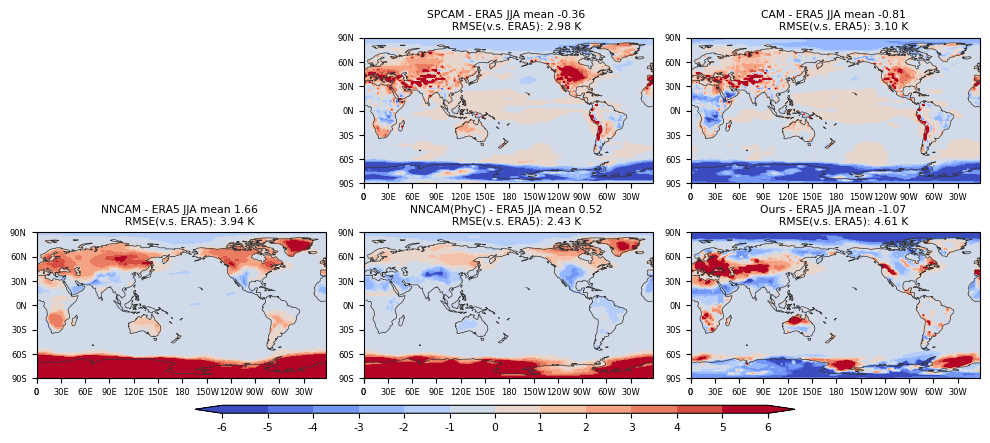

In [129]:


# Define the tick values and corresponding boundaries
tick_values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
boundaries = np.array(tick_values)

# Create a color map and normalization
# cmap = cm.get_cmap('rainbow', len(tick_values)-1)
cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))

ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(-6, 7, 21)
# plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, jja_t2m[1]-jja_t2m[0], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM - ERA5 JJA mean {np.mean(jja_t2m[1]-jja_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, jja_t2m[4]-jja_t2m[0], color_interval, cmap=cmap)
ax3.set_title(f"CAM - ERA5 JJA mean {np.mean(jja_t2m[4]-jja_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, jja_t2m[2]-jja_t2m[1], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM - ERA5 JJA mean {np.mean(jja_t2m[2]-jja_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(jja_t2m[2], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax5, jja_t2m[3]-jja_t2m[1], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) - ERA5 JJA mean {np.mean(jja_t2m[3]-jja_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(jja_t2m[3], jja_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax6, jja_t2m[5]-jja_t2m[1], color_interval, cmap=cmap)
ax6.set_title(f"Ours - ERA5 JJA mean {np.mean(jja_t2m[6]-jja_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(jja_t2m[5], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
# ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
# ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
# ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
# ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
# ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
# ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
# ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
# ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
# ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
# ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
# ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
# ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()

/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/3409461306.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
/var/folders/mr/4f615nzn1bjdv2l4kx1s9n3w0000gn/T/ipykernel_3821/3409461306.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.01, 1, 1])


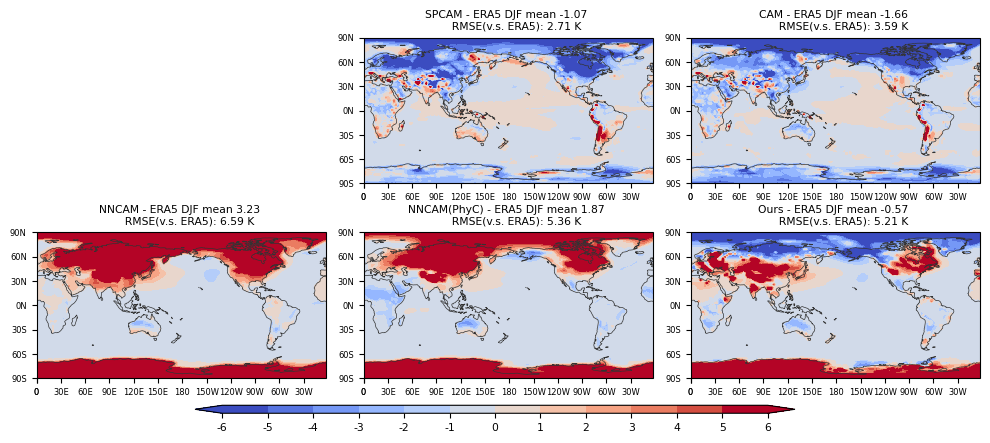

In [130]:


# Define the tick values and corresponding boundaries
tick_values = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
boundaries = np.array(tick_values)

# Create a color map and normalization
# cmap = cm.get_cmap('rainbow', len(tick_values)-1)
cmap = cm.get_cmap('coolwarm', len(tick_values)-1)
norm = BoundaryNorm(boundaries, cmap.N, clip=True)
lon = np.linspace(0,357.5,144)
lat = np.linspace(-90,90,96)

# Create the figure and axis
# fig, ax = plt.subplots(3,3,figsize=(12,6), height_ratios=[1,1,0.5], subplot_kw={'projection': ccrs.PlateCarree()})
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))

ax2 = plt.subplot(gs[0, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax3 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree(central_longitude=180))
ax4 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree(central_longitude=180))
ax5 = plt.subplot(gs[1, 1], projection=ccrs.PlateCarree(central_longitude=180))
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax7 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax8 = plt.subplot(gs[2, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax9 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax10 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax11 = plt.subplot(gs[3, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax12 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax13 = plt.subplot(gs[4, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax14 = plt.subplot(gs[4, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax15 = plt.subplot(gs[4, 2], projection=ccrs.PlateCarree(central_longitude=180))
# ax16 = plt.subplot(gs[5, 0], projection=ccrs.PlateCarree(central_longitude=180))
# ax17 = plt.subplot(gs[5, 1], projection=ccrs.PlateCarree(central_longitude=180))
# ax18 = plt.subplot(gs[5, 2], projection=ccrs.PlateCarree(central_longitude=180))
# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.2, -0.02, 0.6, 0.02])
# cax = plt.subplot(gs[2,:])  # This is where the colorbar will be

is_nan_mask = np.isnan(jja_t2m[0])
jja_t2m[:,is_nan_mask] = 0
is_nan_mask = np.isnan(ann_t2m[0])
ann_t2m[:,is_nan_mask] = 0
font = {'weight':'normal','size':7.75}
# Display the data with imshow using the custom colormap and normalization
# ax[0,0].contourf(jja_t2m[0,::-1], cmap=cmap, norm=norm)
color_interval = np.linspace(-6, 7, 21)
# plot_single_t2m(ax1, ann_t2m[0], color_interval, cmap=cmap)
# ax1.set_title(f"TRMM ANN mean {np.mean(ann_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax2, djf_t2m[1]-djf_t2m[0], color_interval, cmap=cmap)
ax2.set_title(f"SPCAM - ERA5 DJF mean {np.mean(djf_t2m[1]-djf_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax3, djf_t2m[4]-djf_t2m[0], color_interval, cmap=cmap)
ax3.set_title(f"CAM - ERA5 DJF mean {np.mean(djf_t2m[4]-djf_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax4, djf_t2m[2]-djf_t2m[1], color_interval, cmap=cmap)
ax4.set_title(f"NNCAM - ERA5 DJF mean {np.mean(djf_t2m[2]-djf_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(djf_t2m[2], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax5, djf_t2m[3]-djf_t2m[1], color_interval, cmap=cmap)
ax5.set_title(f"NNCAM(PhyC) - ERA5 DJF mean {np.mean(djf_t2m[3]-djf_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(djf_t2m[3], djf_t2m[0]):.2f} K", font=font)
plot_single_t2m(ax6, djf_t2m[5]-djf_t2m[1], color_interval, cmap=cmap)
ax6.set_title(f"Ours - ERA5 DJF mean {np.mean(djf_t2m[6]-djf_t2m[0]):.2f} \n \
    RMSE(v.s. ERA5): {rmse(djf_t2m[5], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax7, djf_t2m[0], color_interval, cmap=cmap)
# ax7.set_title(f"TRMM DJF mean {np.mean(djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax8, djf_t2m[1], color_interval, cmap=cmap)
# ax8.set_title(f"SPCAM DJF mean {np.mean(djf_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[1], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax9, djf_t2m[4], color_interval, cmap=cmap)
# ax9.set_title(f"CAM DJF mean {np.mean(djf_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(djf_t2m[4], djf_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax10, djf_t2m[2], color_interval, cmap=cmap)
# ax10.set_title(f"NNCAM DJF mean {np.mean(djf_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[2], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax11, djf_t2m[3], color_interval, cmap=cmap)
# ax11.set_title(f"NNCAM(PhyC) DJF mean {np.mean(djf_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[3], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax12, djf_t2m[5], color_interval, cmap=cmap)
# ax12.set_title(f"Ours DJF mean {np.mean(djf_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(djf_t2m[5], djf_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax13, jja_t2m[0], color_interval, cmap=cmap)
# ax13.set_title(f"TRMM JJA mean {np.mean(jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax14, jja_t2m[1], color_interval, cmap=cmap)
# ax14.set_title(f"SPCAM JJA mean {np.mean(jja_t2m[1]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[1], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax15, jja_t2m[4], color_interval, cmap=cmap)
# ax15.set_title(f"CAM JJA mean {np.mean(jja_t2m[4]):.2f} \n \
#     RMSE(v.s. TRMM): {rmse(jja_t2m[4], jja_t2m[0]):.2f} K", font=font)
# plot_single_t2m(ax16, jja_t2m[2], color_interval, cmap=cmap)
# ax16.set_title(f"NNCAM JJA mean {np.mean(jja_t2m[2]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[2], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax17, jja_t2m[3], color_interval, cmap=cmap)
# ax17.set_title(f"NNCAM(PhyC) JJA mean {np.mean(jja_t2m[3]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[3], jja_t2m[1]):.2f} K", font=font)
# plot_single_t2m(ax18, jja_t2m[5], color_interval, cmap=cmap)
# ax18.set_title(f"Ours JJA mean {np.mean(jja_t2m[5]):.2f} \n \
#     RMSE(v.s. SPCAM): {rmse(jja_t2m[5], jja_t2m[1]):.2f} K", font=font)

# ax[1,0].set_title(f"TRMM jja mean: {np.mean(jja_t2m[0]):.2f} mm/day")
# ax[1].set_title(f"SPCAM jja mean: {np.mean(jja_t2m[1]):.2f} mse: {np.sqrt(np.mean((jja_t2m[0]-jja_t2m[1])**2)):.2f}")

# Add the color bar using the same normalization and colormap
# turn off plots for ax[:,3]
# for i in range(2):
#     ax[i,3].axis('off')
# make ax[:,3] width smaller
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', boundaries=boundaries, extend="both")
# cbar.set_label("t2miation mm/day")

# Set the tick positions and labels on the color bar
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_values, font=font)

# plt.tight_layout()
plt.tight_layout(rect=[0, 0.01, 1, 1])
plt.subplots_adjust(hspace=0.3, wspace=0.13)
# Display the plot
plt.show()